In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data pre-processing

In [367]:
# training data set
df_train = pd.read_csv('training_data.csv')

# our label to predict is 'num' which will be either 0 or 1
# remove the other values
df_train = df_train[(df_train['num'] == 0) | (df_train['num'] == 1)]

# submission data set
df_submission = pd.read_csv('submission_data.csv')

# remove 'id' column from training as its useless for training
df_train.drop('id', axis=1,inplace=True)

# view first few rows of training dataset
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,slope,thal,num
0,36,1,2,120,267,0,0,160,0,3,2,-9,-9,1
3,48,1,2,100,-9,0,0,100,0,0,-9,-9,-9,0
4,41,0,2,125,184,0,0,180,0,0,-9,-9,-9,0
5,58,1,4,120,0,0,2,106,1,1.5,3,?,7,1
6,53,1,4,140,243,0,0,155,0,0,-9,-9,-9,0


categorical: sex, cp, fbs, restecg, exang, ca, thal, slope

numerical: age, trestbps, chol, thalach, oldpeak, 


In [368]:
# we know that values of '-9' and '?' are missing so make it a NaN

def make_nan(s):
    if s == '-9' or s == '?':
        s = np.nan
    return float(s)

df_train = df_train.applymap(make_nan)
df_submission = df_submission.applymap(make_nan)
# list containing both datasets
combine = [df_train, df_submission]

In [369]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 819
Data columns (total 14 columns):
age         545 non-null float64
sex         545 non-null float64
cp          545 non-null float64
trestbps    516 non-null float64
chol        528 non-null float64
fbs         493 non-null float64
restecg     544 non-null float64
thalach     516 non-null float64
exang       516 non-null float64
oldpeak     513 non-null float64
ca          331 non-null float64
slope       204 non-null float64
thal        258 non-null float64
num         545 non-null float64
dtypes: float64(14)
memory usage: 63.9 KB


In [370]:
# dropping columns because these have too many missing values
drop = ['ca', 'slope', 'thal']
for df in combine:
    for col in drop:
        df.drop(col, axis=1, inplace=True)

In [371]:
# sometimes rows with null in a single column are null in other columns as well
# taking a look at trestbps

df_train[df_train['trestbps'].isnull()].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
55,63.0,1.0,2.0,NaN,165.0,0.0,1.0,NaN,NaN,NaN,0.0
61,72.0,1.0,4.0,NaN,211.0,0.0,0.0,NaN,NaN,NaN,1.0
79,55.0,1.0,3.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,0.0
87,55.0,1.0,4.0,NaN,204.0,1.0,1.0,NaN,NaN,NaN,1.0
248,54.0,1.0,2.0,NaN,182.0,0.0,1.0,NaN,NaN,NaN,0.0


In [372]:
# we can see that rows null in trestbps are also null in the other columns
# oldpeak, exang, thalach, and trestbps have very similar number of missing values

df_train = df_train[df_train['trestbps'].notnull()]
combine[0] = df_train

# we can see that we were right. now we have less missing in all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 819
Data columns (total 11 columns):
age         516 non-null float64
sex         516 non-null float64
cp          516 non-null float64
trestbps    516 non-null float64
chol        501 non-null float64
fbs         464 non-null float64
restecg     515 non-null float64
thalach     516 non-null float64
exang       516 non-null float64
oldpeak     512 non-null float64
num         516 non-null float64
dtypes: float64(11)
memory usage: 48.4 KB


In [373]:
df_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,516.000000,516.000000,516.000000,516.000000,501.000000,464.000000,515.000000,516.000000,516.000000,512.000000,516.000000
mean,51.387597,0.711240,3.007752,129.885659,208.664671,0.120690,0.559223,144.379845,0.250000,0.548828,0.313953
std,9.415385,0.453626,0.951207,17.676612,98.302062,0.326118,0.819205,24.567543,0.433433,0.827156,0.464548
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,44.000000,0.000000,2.000000,120.000000,192.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000
50%,52.000000,1.000000,3.000000,130.000000,225.000000,0.000000,0.000000,147.500000,0.000000,0.000000,0.000000
75%,58.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,163.000000,0.250000,1.000000,1.000000
max,76.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,1.000000


# data analysis

In [374]:
# men are more likely to have heart disease
df_train[['sex','num']].groupby('sex').mean()

,num
sex,
0.0,0.127517
1.0,0.389646


In [375]:
# those with asymptomatic chest pain are most likely to have heart disease
df_train[['cp','num']].groupby('cp').mean()

,num
cp,
1.0,0.275862
2.0,0.083333
3.0,0.182482
4.0,0.567961


we see that chest pain type and gender plays a role in deciding whether one has heart disease or not. we can use this fact in our data visualisation

### visualise cholesterol levels

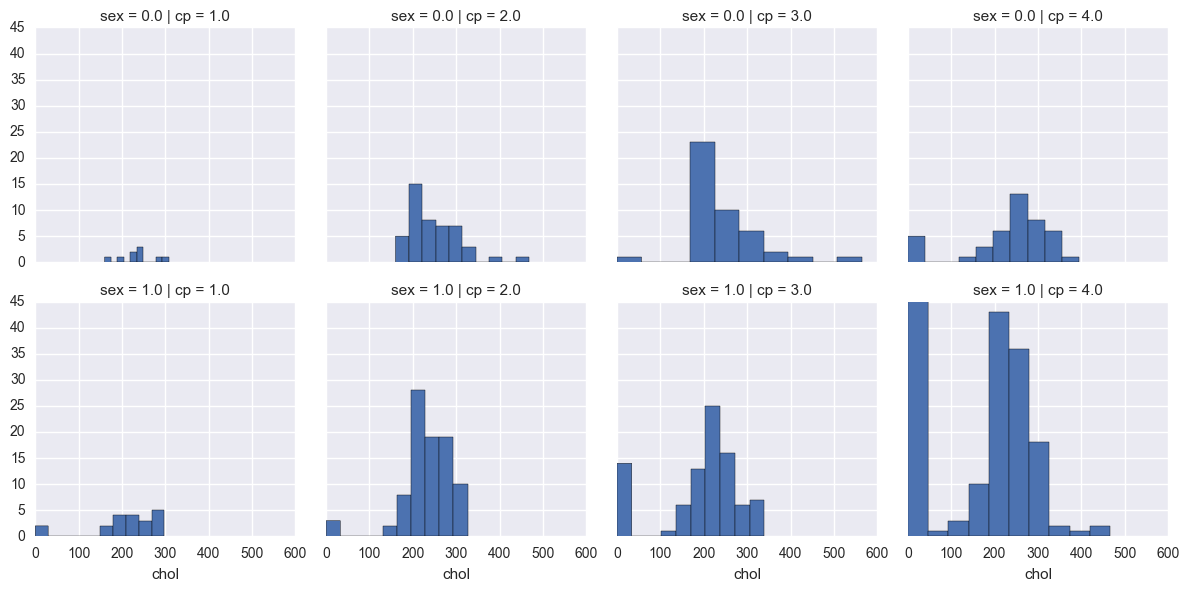

In [376]:
# visualise chol

g=sns.FacetGrid(df_train, 'sex', 'cp')
g.map(plt.hist, 'chol', bins=10)

In [377]:
# fill in missing chol values with median

for df in combine:
    for cp in range(1,5):
        for sex in range(2):
            a=df[(df['cp'] == cp) & (df['sex'] == sex)]['chol'].median()
            df.loc[(df['cp'] == cp) & (df['sex'] == sex) & (df['chol'].isnull()), 'chol']=a 

In [378]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 819
Data columns (total 11 columns):
age         516 non-null float64
sex         516 non-null float64
cp          516 non-null float64
trestbps    516 non-null float64
chol        516 non-null float64
fbs         464 non-null float64
restecg     515 non-null float64
thalach     516 non-null float64
exang       516 non-null float64
oldpeak     512 non-null float64
num         516 non-null float64
dtypes: float64(11)
memory usage: 48.4 KB


### visualise fbs

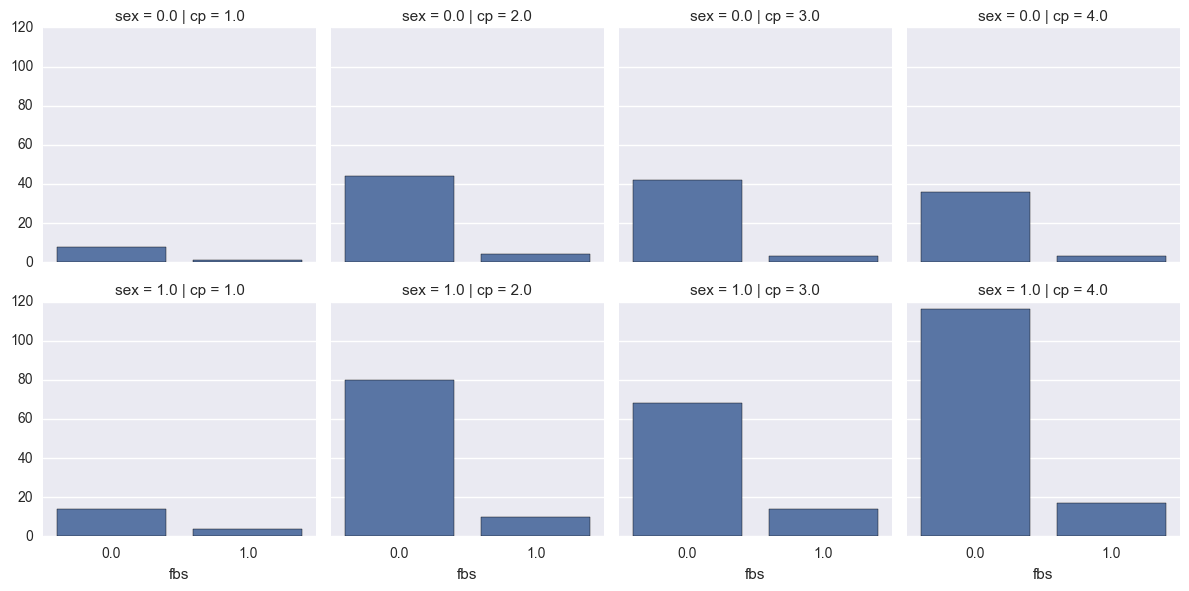

In [379]:
g=sns.FacetGrid(df_train, 'sex', 'cp')
g.map(sns.countplot, 'fbs')

In [380]:
# majority have fasting blood sugar <= 120 mg/dl (value of 0)
df_train.loc[df_train['fbs'].isnull(), 'fbs'] = 0
df_submission.loc[df_submission['fbs'].isnull(), 'fbs'] = 0

### fill restecg (single row in training set) with mode

In [381]:
a=df_train['restecg'].mode()[0]
df_train.loc[df_train['restecg'].isnull(), 'restecg'] = a

### fill oldpeak, exang, thalach, trestbps with median

In [382]:
# fill oldpeak, exang, thalach, trestbps with median
for df in combine:
    for cp in range(1,5):
        for sex in range(2):
            a=df[(df['cp'] == cp) & (df['sex'] == sex)]['oldpeak'].median()
            b=df[(df['cp'] == cp) & (df['sex'] == sex)]['exang'].median()
            c=df[(df['cp'] == cp) & (df['sex'] == sex)]['thalach'].median()
            d=df[(df['cp'] == cp) & (df['sex'] == sex)]['trestbps'].median()

            df.loc[(df['cp'] == cp) & (df['sex'] == sex) & (df['oldpeak'].isnull()), 'oldpeak']=a 
            df.loc[(df['cp'] == cp) & (df['sex'] == sex) & (df['exang'].isnull()), 'exang']=b
            df.loc[(df['cp'] == cp) & (df['sex'] == sex) & (df['thalach'].isnull()), 'thalach']=c
            df.loc[(df['cp'] == cp) & (df['sex'] == sex) & (df['trestbps'].isnull()),'trestbps']=d 


### now all data cleaned

In [383]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
id          100 non-null float64
age         100 non-null float64
sex         100 non-null float64
cp          100 non-null float64
trestbps    100 non-null float64
chol        100 non-null float64
fbs         100 non-null float64
restecg     100 non-null float64
thalach     100 non-null float64
exang       100 non-null float64
oldpeak     100 non-null float64
num         0 non-null float64
dtypes: float64(12)
memory usage: 9.5 KB


In [384]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 819
Data columns (total 11 columns):
age         516 non-null float64
sex         516 non-null float64
cp          516 non-null float64
trestbps    516 non-null float64
chol        516 non-null float64
fbs         516 non-null float64
restecg     516 non-null float64
thalach     516 non-null float64
exang       516 non-null float64
oldpeak     516 non-null float64
num         516 non-null float64
dtypes: float64(11)
memory usage: 48.4 KB


In [385]:
la=pd.concat(combine)
for c in la.columns:
    print(c, '\n', la[c].value_counts(dropna=False),'\n')

age 
 54.0    34
59.0    27
58.0    27
57.0    27
53.0    25
52.0    24
55.0    23
51.0    22
56.0    21
48.0    21
41.0    21
62.0    21
46.0    20
60.0    19
50.0    17
43.0    17
42.0    16
61.0    15
45.0    15
49.0    15
44.0    14
47.0    14
63.0    13
39.0    13
64.0    13
38.0    12
37.0    11
65.0    11
40.0    10
35.0     9
66.0     8
67.0     7
34.0     7
36.0     6
68.0     5
69.0     5
74.0     4
71.0     4
32.0     4
70.0     3
75.0     3
29.0     3
33.0     2
72.0     2
31.0     2
76.0     1
30.0     1
28.0     1
73.0     1
Name: age, dtype: int64 

chol 
 0.0      89
220.0    13
216.0     9
211.0     8
240.0     8
244.0     7
197.0     7
223.0     7
207.0     6
213.0     6
249.0     6
243.0     6
235.0     6
226.0     6
204.0     6
275.0     6
196.0     6
201.0     6
263.0     6
283.0     5
215.0     5
233.0     5
245.0     5
198.0     5
230.0     5
277.0     5
250.0     5
160.0     5
225.0     5
269.0     5
         ..
299.0     1
259.0     1
251.0     1
331.0     1
39

## more data work now (encoding, categorizing, etc)

In [392]:
# change 'age' column into ordinal categories

for df in combine:
    a=sum(df['age'] <= 34) # millenial
    b=sum((df['age'] >= 35) & (df['age'] <= 50)) # gen x
    c=sum((df['age'] >= 51) & (df['age'] <= 69)) # boomer
    d=sum(df['age'] >= 70) # silent

    print(a,b,c,d)
    
    
for df in combine:
    df.loc[df['age'] <= 34, 'age'] = 1
    df.loc[(df['age'] >= 35) & (df['age'] <= 50), 'age'] = 2
    df.loc[(df['age'] >= 51) & (df['age'] <= 69), 'age'] = 3
    df.loc[df['age'] >= 70, 'age'] = 4

18 206 281 11
2 25 66 7


In [387]:
# change oldpeak to binary
for df in combine:
    df.loc[df['oldpeak'] != 0, 'oldpeak'] = 1

In [388]:
# categorizing resting blood pressure

for df in combine:
    a=sum(df['trestbps'] < 120) # normal
    b=sum((df['trestbps'] >= 120) & (df['trestbps'] < 140)) # risk
    c=sum(df['trestbps'] >= 140) # high
    print(a,b,c)

112 239 165
17 48 35


In [389]:
# we can see that we have a good amount of numbers in each category

for df in combine:
    df.loc[(df['trestbps'] < 120), 'trestbps'] = 1 # normal
    df.loc[(df['trestbps'] >= 120) & (df['trestbps'] < 140), 'trestbps'] = 2 # risk
    df.loc[(df['trestbps'] >= 140), 'trestbps'] = 3 # high

In [390]:
# categorizing total cholesterol (serum cholesterol)

for df in combine:
    a=sum(df['chol'] < 200) # normal
    b=sum((df['chol'] >= 200) & (df['chol'] < 240)) # risk
    c=sum(df['chol'] >= 240) # high
    print(a,b,c)

155 153 208
30 28 42


In [391]:
# we can see that we have a good amount of numbers in each category
for df in combine:
    df.loc[(df['chol'] < 200), 'chol'] = 1 # normal
    df.loc[(df['chol'] >= 200) & (df['chol'] < 240), 'chol'] = 2 # risk
    df.loc[(df['chol'] >= 240), 'chol'] = 3 # high

In [393]:
# artificial feature
for df in combine:
    df['chol*trestbps'] = (df['chol'] * df['trestbps']).astype(np.int8)

In [ ]:
# check how well performance is if we perform one-hot-encoding

In [394]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,chol*trestbps
0,2.0,1.0,2.0,2.0,3.0,0.0,0.0,160.0,0.0,1.0,1.0,6
3,2.0,1.0,2.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,2
4,2.0,0.0,2.0,2.0,1.0,0.0,0.0,180.0,0.0,0.0,0.0,2
5,3.0,1.0,4.0,2.0,1.0,0.0,2.0,106.0,1.0,1.0,1.0,2
6,3.0,1.0,4.0,3.0,3.0,0.0,0.0,155.0,0.0,0.0,0.0,9


In [395]:
df_train_copy = df_train.copy()
df_submission_copy = df_submission.copy()
combine_copy = [df_train_copy, df_submission_copy]

In [396]:
one_hot_col = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'chol*trestbps']
for df in combine_copy:
    for col in one_hot_col:
        temp=pd.get_dummies(df[col], prefix=col, drop_first=True)
        df.drop(col, axis=1, inplace=True)
        df[temp.columns] = temp

In [397]:
df_train_copy.head()

,sex,fbs,thalach,exang,oldpeak,num,age_2.0,age_3.0,age_4.0,cp_2.0,...,trestbps_3.0,chol_2.0,chol_3.0,restecg_1.0,restecg_2.0,chol*trestbps_2,chol*trestbps_3,chol*trestbps_4,chol*trestbps_6,chol*trestbps_9
0,1.0,0.0,160.0,0.0,1.0,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,1.0,0.0,100.0,0.0,0.0,0.0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0.0,0.0,180.0,0.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,1.0,0.0,106.0,1.0,1.0,1.0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
6,1.0,0.0,155.0,0.0,0.0,0.0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1


In [398]:
df_submission['age'].value_counts()

3.0    66
2.0    25
4.0     7
1.0     2
Name: age, dtype: int64

In [399]:
# save one-hot-encoded data
df_train_copy.to_csv('cleaned_train_data_encoded.csv', index=False)
df_submission_copy.to_csv('cleaned_submission_data_encoded.csv', index=False)

In [400]:
# save cleaned data
df_train.to_csv('cleaned_train_data.csv', index=False)
df_submission.to_csv('cleaned_submission_data.csv', index=False)

## Medical meta-data 


cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
        
trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
        
ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)